#### https://www.kaggle.com/datasets/shwetabh123/mall-customers

In [1]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('Mall_Customers.csv')

# 데이터 구조 확인
print(data.head())
print(data.info())

# 기본 통계 확인
print(data.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

### 2. 데이터 전처리

In [2]:
# 결측값 확인
print(data.isnull().sum())

# 필요한 특성 선택 (연령, 연간 소득, 지출 점수)
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

# 데이터 스케일링 (DBSCAN과 GMM은 스케일에 민감)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 스케일링된 데이터프레임
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
print(X_scaled_df.head())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


### 3-1. DBSCAN 클러스터링

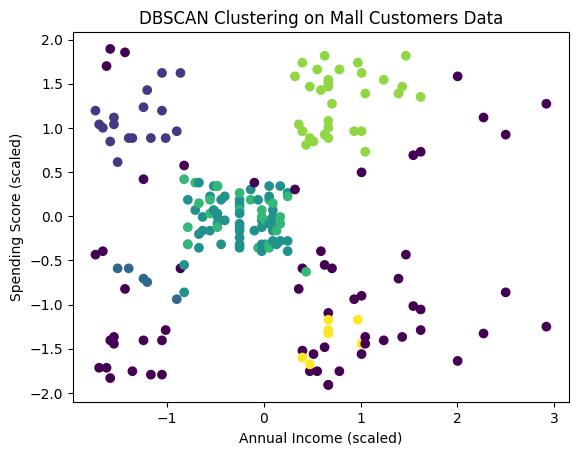

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   DBSCAN_cluster  
0              -1  
1               0  
2              -1  
3               0  
4              -1  


In [3]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# DBSCAN 모델 적용
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# 결과 시각화
labels = dbscan.labels_
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering on Mall Customers Data')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

# 클러스터 라벨과 원본 데이터를 포함한 DataFrame
data['DBSCAN_cluster'] = labels### 3-2. GMM 클러스터링
print(data.head())

### 3-2. GMM 클러스터링

In [4]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model 적용
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)

# 클러스터 할당
gmm_labels = gmm.predict(X_scaled)

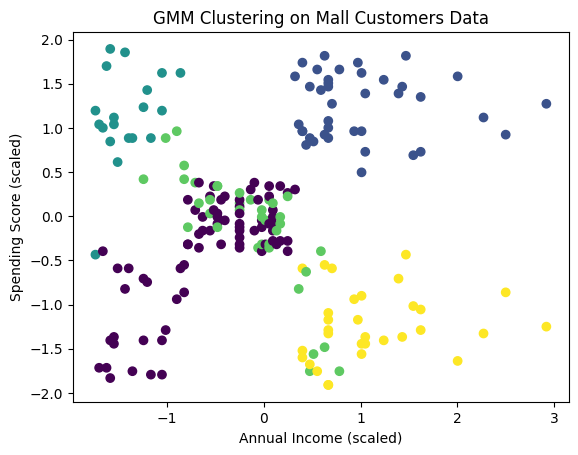

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   DBSCAN_cluster  GMM_cluster  
0              -1            2  
1               0            2  
2              -1            0  
3               0            2  
4              -1            0  


In [5]:
# 결과 시각화
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering on Mall Customers Data')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

# 클러스터 라벨과 원본 데이터를 포함한 DataFrame
data['GMM_cluster'] = gmm_labels
print(data.head())


### 4. 분석 및 활용 방안

In [6]:
# 클러스터별 고객 수 확인 (DBSCAN)
print(data['DBSCAN_cluster'].value_counts())

# 클러스터별 고객 수 확인 (GMM)
print(data['GMM_cluster'].value_counts())

# 클러스터별 통계 확인 (GMM 예시)
# 비숫자형 열 제외
numeric_features = data.select_dtypes(include=[int, float]).columns.tolist()
numeric_features = [feature for feature in numeric_features if feature != 'GMM_cluster']

cluster_stats = data.groupby('GMM_cluster')[numeric_features].mean()
print(cluster_stats)

DBSCAN_cluster
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64
GMM_cluster
0    74
1    39
3    37
4    31
2    19
Name: count, dtype: int64
             CustomerID        Age  Annual Income (k$)  \
GMM_cluster                                              
0             66.162162  50.851351           46.229730   
1            162.000000  32.692308           86.538462   
2             18.789474  24.526316           23.315789   
3             90.702703  24.054054           56.486486   
4            166.870968  44.387097           89.774194   

             Spending Score (1-100)  DBSCAN_cluster  
GMM_cluster                                          
0                         40.635135        1.270270  
1                         82.128205        3.102564  
2                         79.526316       -0.210526  
3                         47.189189        1.945946  
4                         18.483871        0.354839  


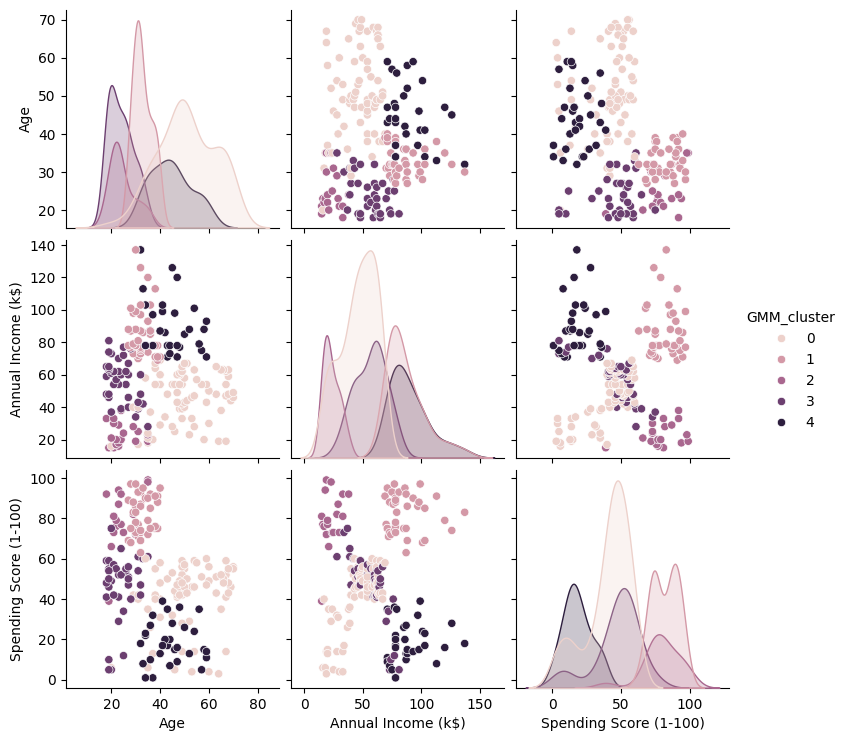

In [7]:
# 각 클러스터의 특성 시각화
import seaborn as sns

sns.pairplot(data, hue='GMM_cluster', vars=selected_features)
plt.show()

In [8]:
# 특정 고객의 클러스터 확인 (예: 인덱스가 0인 고객)
customer_index = 0
customer_cluster = data.loc[customer_index, 'GMM_cluster']
print(f"Customer {customer_index} is in cluster {customer_cluster}")


Customer 0 is in cluster 2


In [9]:
# 특정 고객이 속한 클러스터의 통계 정보 조회
customer_cluster = data.loc[customer_index, 'GMM_cluster']
cluster_info = cluster_stats.loc[customer_cluster]
print(f"Cluster {customer_cluster} statistics:")
print(cluster_info)

Cluster 2 statistics:
CustomerID                18.789474
Age                       24.526316
Annual Income (k$)        23.315789
Spending Score (1-100)    79.526316
DBSCAN_cluster            -0.210526
Name: 2, dtype: float64


### 6. 활용 예시
- 클러스터 0: 평균 연령이 낮고 지출 점수가 높은 고객을 대상으로 할인을 제공하거나, 소셜 미디어 마케팅 캠페인을 집중하기
- 클러스터 1: 연간 소득이 높은 고객을 대상으로 프리미엄 제품이나 서비스를 추천하기